In [397]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [341]:
crop= pd.read_csv('crop_production.csv')
crop.head() #1st data inspection

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [342]:
crop.shape

(246091, 7)

In [343]:
crop.describe()  #2nd data inspection

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [344]:
crop.info()  #3rd data inspection

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [345]:
crop.isnull().sum() #4th data inspection

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [346]:
crop.duplicated().sum() #5th data inspection

np.int64(0)

<Axes: xlabel='Area'>

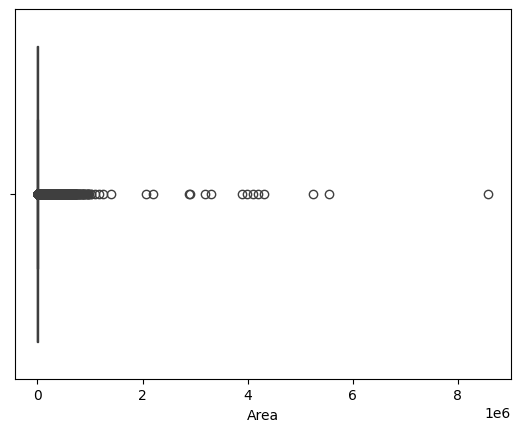

In [347]:
sns.boxplot(x=crop['Area']) #boxplot to check for outliers in Area column

In [348]:

print(crop.nlargest(10, 'Area')[['State_Name', 'Crop', 'Area']])

         State_Name            Crop       Area
244878  West Bengal  Oilseeds total  8580100.0
244290  West Bengal  Oilseeds total  5544000.0
243654  West Bengal  Oilseeds total  5251200.0
244305  West Bengal    Pulses total  4307200.0
236486  West Bengal  Oilseeds total  4205800.0
244891  West Bengal    Pulses total  4094900.0
238007  West Bengal  Oilseeds total  3989200.0
240719  West Bengal  Oilseeds total  3893900.0
241314  West Bengal  Oilseeds total  3304700.0
237381  West Bengal  Oilseeds total  3179900.0


In [349]:
crop['Crop'].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

In [350]:
crop = crop[~crop['Crop'].str.contains('Total', case=False)]
crop = crop[~crop['Crop'].str.contains('total', case=False)]

In [351]:
crop = crop[~crop['Crop'].str.contains('Other', case=False)]
crop = crop[~crop['Crop'].str.contains('other', case=False)]

In [352]:
crop['Crop'].unique()

array(['Arecanut', 'Rice', 'Banana', 'Cashewnut', 'Coconut ',
       'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'Turmeric', 'Maize',
       'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut', 'Sunflower',
       'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram', 'Jowar',
       'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor', 'Sesamum',
       'Linseed', 'Safflower', 'Onion', 'Samai', 'Small millets',
       'Coriander', 'Potato', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard',
       'Mesta', 'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota',
       'Cabbage', 'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd',
       'Sannhamp', 'Varagu', 'Garlic', 'Ginger', 'Jute',
       'Peas & beans (Pulses)', 'Blackgram', 'Paddy', 'Pineapple',
       'Barley', 'Khesari', 'Guar seed', 'Moth', 'Turni

<Axes: xlabel='Area'>

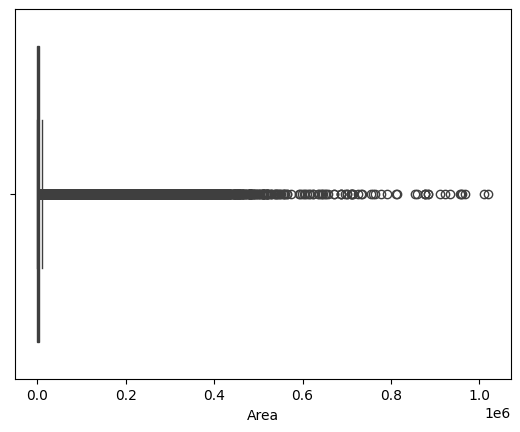

In [353]:
sns.boxplot(x=crop['Area'])  #boxplot to check for outliers in Area column after removing 'Total' and 'Other' crops

<Axes: xlabel='Production'>

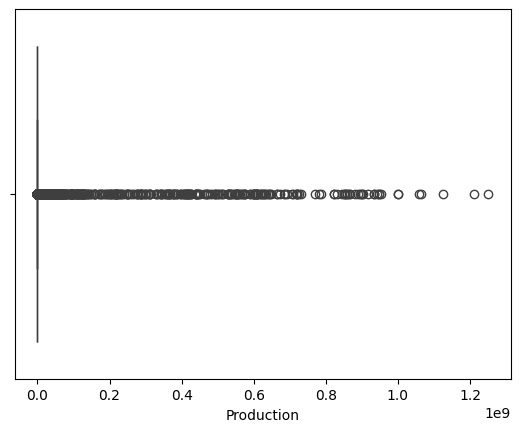

In [354]:
sns.boxplot(x=crop['Production'])  #boxplot to check for outliers in Production column

In [355]:
crop.shape

(236152, 7)

deletion of null values as they are only about 2 percent in all

In [356]:
crop.dropna(subset=['Production'],inplace=True)

In [357]:
crop.shape

(232686, 7)

In [358]:
crop.drop(columns=['District_Name'],inplace=True)

In [359]:
crop.head()

,State_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,2000,Kharif,Arecanut,1254.0,2000.0
2,Andaman and Nicobar Islands,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,2000,Whole Year,Cashewnut,720.0,165.0
5,Andaman and Nicobar Islands,2000,Whole Year,Coconut,18168.0,65100000.0


In [360]:
crop['Yeild'] = crop['Production']/crop['Area']

In [361]:
crop['State_Name'] =crop['State_Name'].str.lower()

In [362]:
crop.head()

,State_Name,Crop_Year,Season,Crop,Area,Production,Yeild
0,andaman and nicobar islands,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
2,andaman and nicobar islands,2000,Kharif,Rice,102.0,321.0,3.147059
3,andaman and nicobar islands,2000,Whole Year,Banana,176.0,641.0,3.642045
4,andaman and nicobar islands,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
5,andaman and nicobar islands,2000,Whole Year,Coconut,18168.0,65100000.0,3583.223250


## For rainfall data

In [363]:
rain = pd.read_csv('rainfall in india 1901-2015.csv')
rain.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [364]:
rain.shape

(4116, 19)

In [365]:
rain.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [366]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [ ]:
rain= rain[rain['YEAR']>=1997]
rain.reset_index(drop=True,inplace=True)
rain.head()


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1997,9.5,0.0,0.2,15.6,281.1,199.5,918.5,430.6,440.2,128.7,292.8,38.4,2755.1,9.5,296.9,1988.8,459.9
1,ANDAMAN & NICOBAR ISLANDS,1998,0.9,0.0,0.0,0.0,348.9,600.0,364.5,258.9,337.8,618.6,227.8,89.0,2846.4,0.9,348.9,1561.2,935.4
2,ANDAMAN & NICOBAR ISLANDS,1999,46.8,44.6,14.2,270.6,257.4,295.0,408.5,329.2,325.3,437.5,124.9,145.7,2699.7,91.4,542.2,1358.0,708.1
3,ANDAMAN & NICOBAR ISLANDS,2000,53.0,59.0,171.3,218.1,422.8,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2,112.0,812.2,1244.2,594.7
4,ANDAMAN & NICOBAR ISLANDS,2001,89.0,15.7,143.3,30.1,705.3,370.7,341.3,469.0,334.4,267.6,222.6,91.8,3080.9,104.7,878.7,1515.4,582.0


In [368]:
rain.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            1
FEB            1
MAR            0
APR            0
MAY            0
JUN            0
JUL            1
AUG            0
SEP            0
OCT            0
NOV            1
DEC            1
ANNUAL         3
Jan-Feb        2
Mar-May        0
Jun-Sep        1
Oct-Dec        1
dtype: int64

In [369]:
rain.dropna(subset=['JAN','FEB','JUL','NOV','DEC','ANNUAL','Jan-Feb','Jun-Sep','Oct-Dec'],inplace=True)

In [370]:

split_mapping = {
    'andaman and nicobar islands': ['andaman and nicobar islands'],
    'arunachal pradesh': ['arunachal pradesh'],
    'assam and meghalaya': ['assam', 'meghalaya'],  # SPLIT
    'naga mani mizo tripura': ['nagaland', 'manipur', 'mizoram', 'tripura'], # SPLIT
    'sub himalayan west bengal and sikkim': ['west bengal', 'sikkim'], # SPLIT
    'gangetic west bengal': ['west bengal'],
    'orissa': ['odisha'],
    'jharkhand': ['jharkhand'],
    'bihar': ['bihar'],
    'east uttar pradesh': ['uttar pradesh'],
    'west uttar pradesh': ['uttar pradesh'],
    'uttarakhand': ['uttarakhand'],
    'haryana delhi and chandigarh': ['haryana', 'chandigarh', 'delhi'], # SPLIT
    'punjab': ['punjab'],
    'himachal pradesh': ['himachal pradesh'],
    'jammu and kashmir': ['jammu and kashmir'],
    'west rajasthan': ['rajasthan'],
    'east rajasthan': ['rajasthan'],
    'west madhya pradesh': ['madhya pradesh'],
    'east madhya pradesh': ['madhya pradesh'],
    'gujarat region': ['gujarat'],
    'saurashtra and kutch': ['gujarat'],
    'konkan and goa': ['maharashtra', 'goa'], # SPLIT
    'madhya maharashtra': ['maharashtra'],
    'matathwada': ['maharashtra'],
    'vidarbha': ['maharashtra'],
    'chhattisgarh': ['chhattisgarh'],
    'coastal andhra pradesh': ['andhra pradesh'],
    'telangana': ['telangana'],
    'rayalseema': ['andhra pradesh'],
    'tamil nadu': ['tamil nadu'],
    'coastal karnataka': ['karnataka'],
    'north interior karnataka': ['karnataka'],
    'south interior karnataka': ['karnataka'],
    'kerala': ['kerala'],
    'lakshadweep': ['lakshadweep']
}

In [ ]:

rain.rename(columns={'SUBDIVISION': 'State_Name'}, inplace=True)


# for '&' to 'and'
rain['State_Name'] = rain['State_Name'].str.lower().str.replace(' & ', ' and ')

# 3. Mapping aur Splitting
rain['State_List'] = rain['State_Name'].map(split_mapping)

# if no name then keep the last name only
rain['State_List'] = rain['State_List'].fillna(rain['State_Name'].apply(lambda x: [x]))

# 4. Explode
rain = rain.explode('State_List').reset_index(drop=True)

# 5. saving actual names and removing the list
rain['State_Name'] = rain['State_List']
rain.drop(columns=['State_List'], inplace=True)

# Output
print(rain[['State_Name', 'YEAR', 'ANNUAL']].head())
print("\nUnique States:", rain['State_Name'].unique())

                    State_Name  YEAR  ANNUAL
0  andaman and nicobar islands  1997  2755.1
1  andaman and nicobar islands  1998  2846.4
2  andaman and nicobar islands  1999  2699.7
3  andaman and nicobar islands  2000  2763.2
4  andaman and nicobar islands  2001  3080.9

Unique States: ['andaman and nicobar islands' 'arunachal pradesh' 'assam' 'meghalaya'
 'nagaland' 'manipur' 'mizoram' 'tripura' 'west bengal' 'sikkim' 'odisha'
 'jharkhand' 'bihar' 'uttar pradesh' 'uttarakhand' 'haryana' 'chandigarh'
 'delhi' 'punjab' 'himachal pradesh' 'jammu and kashmir' 'rajasthan'
 'madhya pradesh' 'gujarat' 'maharashtra' 'goa' 'chhattisgarh'
 'andhra pradesh' 'telangana' 'tamil nadu' 'karnataka' 'kerala'
 'lakshadweep']


In [372]:
rain.head()

,State_Name,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,andaman and nicobar islands,1997,9.5,0.0,0.2,15.6,281.1,199.5,918.5,430.6,440.2,128.7,292.8,38.4,2755.1,9.5,296.9,1988.8,459.9
1,andaman and nicobar islands,1998,0.9,0.0,0.0,0.0,348.9,600.0,364.5,258.9,337.8,618.6,227.8,89.0,2846.4,0.9,348.9,1561.2,935.4
2,andaman and nicobar islands,1999,46.8,44.6,14.2,270.6,257.4,295.0,408.5,329.2,325.3,437.5,124.9,145.7,2699.7,91.4,542.2,1358.0,708.1
3,andaman and nicobar islands,2000,53.0,59.0,171.3,218.1,422.8,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2,112.0,812.2,1244.2,594.7
4,andaman and nicobar islands,2001,89.0,15.7,143.3,30.1,705.3,370.7,341.3,469.0,334.4,267.6,222.6,91.8,3080.9,104.7,878.7,1515.4,582.0


In [373]:
rain['State_Name'].nunique()

33

In [374]:
rain.shape

(833, 19)

In [375]:
rain.duplicated().sum()

np.int64(0)

In [376]:
rain['Autumn']=rain[['OCT','NOV']].sum(axis=1)/2
rain.rename(columns={'Jun-Sep':'Kharif'},inplace=True)
rain.rename(columns={'Oct-Dec':'Rabi'},inplace=True)
rain.rename(columns={'ANNUAL':'Whole Year'},inplace=True)
rain.rename(columns={'Mar-May':'Summer'},inplace=True)
rain['Winter']=rain[['DEC','Jan-Feb']].sum(axis=1)/2

In [377]:
rain.drop(columns=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','Jan-Feb'],axis=1,inplace=True)

In [378]:
rain.head()

,State_Name,YEAR,Whole Year,Summer,Kharif,Rabi,Autumn,Winter
0,andaman and nicobar islands,1997,2755.1,296.9,1988.8,459.9,210.75,23.95
1,andaman and nicobar islands,1998,2846.4,348.9,1561.2,935.4,423.20,44.95
2,andaman and nicobar islands,1999,2699.7,542.2,1358.0,708.1,281.20,118.55
3,andaman and nicobar islands,2000,2763.2,812.2,1244.2,594.7,239.75,113.60
4,andaman and nicobar islands,2001,3080.9,878.7,1515.4,582.0,245.10,98.25


In [379]:
rain.isnull().sum()

State_Name    0
YEAR          0
Whole Year    0
Summer        0
Kharif        0
Rabi          0
Autumn        0
Winter        0
dtype: int64

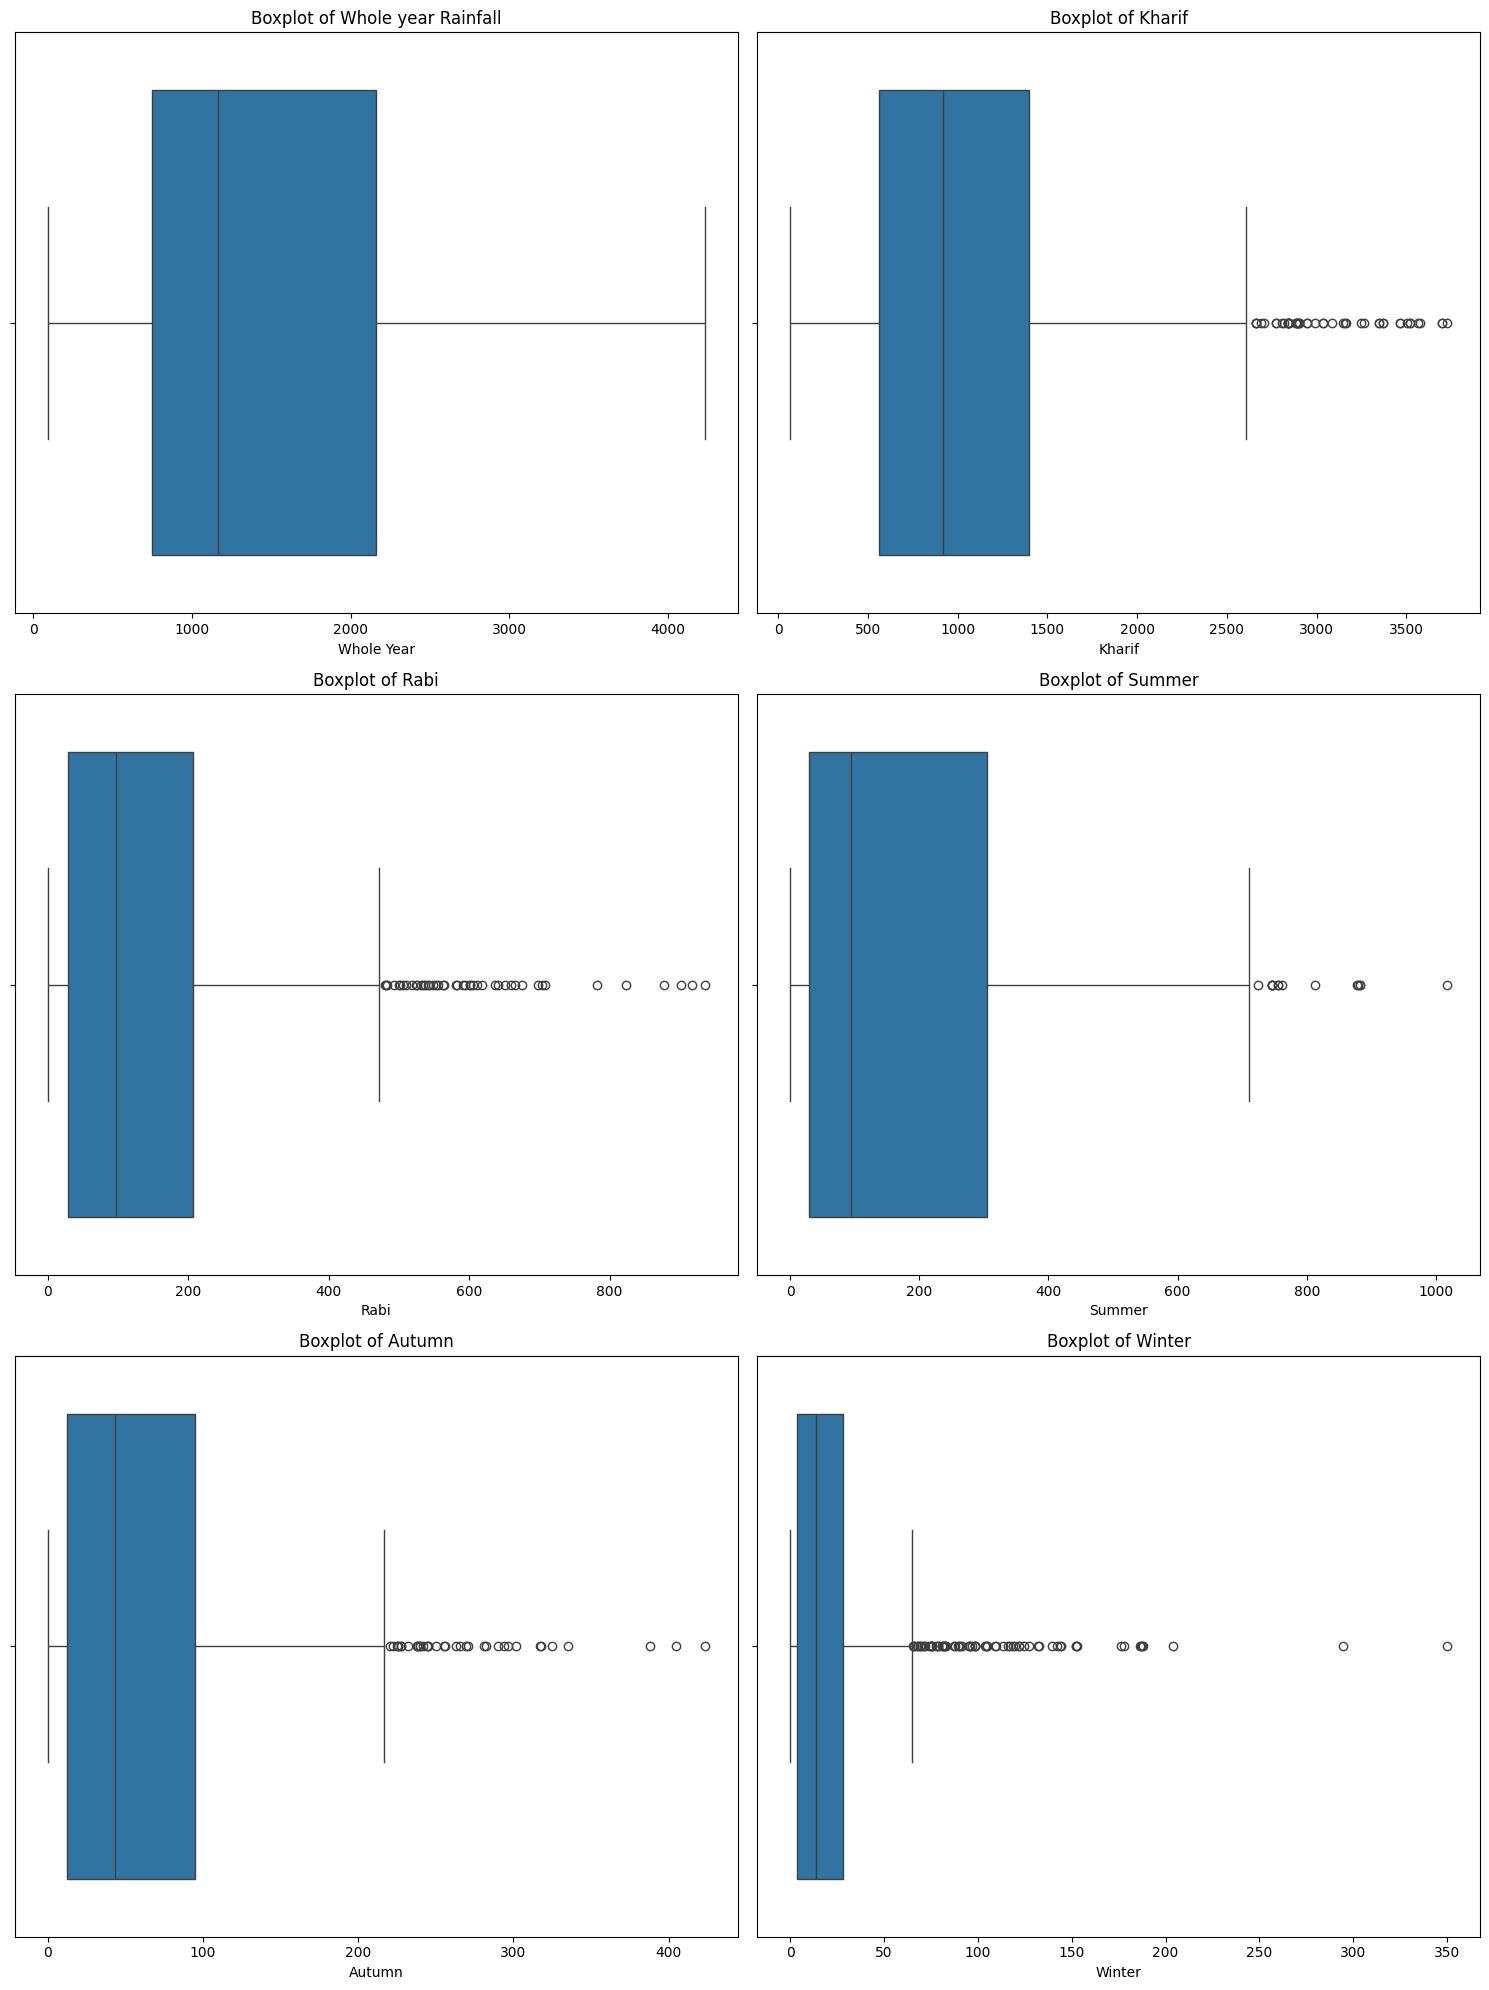

In [ ]:

fig, axs = plt.subplots(3, 2, figsize=(15, 20))


sns.boxplot(x=rain['Whole Year'], ax=axs[0, 0])
axs[0, 0].set_title('Boxplot of Whole year Rainfall')

sns.boxplot(x=rain['Kharif'], ax=axs[0, 1])
axs[0, 1].set_title('Boxplot of Kharif')


sns.boxplot(x=rain['Rabi'], ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of Rabi')

sns.boxplot(x=rain['Summer'], ax=axs[1, 1])
axs[1, 1].set_title('Boxplot of Summer')


sns.boxplot(x=rain['Autumn'], ax=axs[2, 0])
axs[2, 0].set_title('Boxplot of Autumn')

sns.boxplot(x=rain['Winter'], ax=axs[2, 1])
axs[2, 1].set_title('Boxplot of Winter')


plt.tight_layout()
plt.show()

as we can observe extreme values we have to chekc what were the possible reason for that thats why we gonna do .describe

In [381]:
rain.describe()

,YEAR,Whole Year,Summer,Kharif,Rabi,Autumn,Winter
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,2005.996399,1457.897599,187.868908,1091.225330,145.181753,65.310444,24.089436
std,5.481502,895.897178,207.951823,715.737498,156.385623,68.856919,34.069779
min,1997.000000,92.400000,0.000000,67.200000,0.000000,0.000000,0.000000
25%,2001.000000,748.400000,29.000000,563.500000,29.100000,12.400000,3.700000
50%,2006.000000,1163.100000,93.500000,919.200000,97.500000,43.350000,13.900000
75%,2011.000000,2162.200000,305.300000,1397.800000,207.400000,95.200000,28.100000
max,2015.000000,4229.400000,1017.500000,3727.600000,935.400000,423.200000,350.000000


as we coudl observe that 75% of each is less like for winter its 28.1, autumn its 95.2 and for their max the values is more than 10x so wee need **Windsorization** or caping to cap the vales which are extreme instead of deletion

In [ ]:
# 1. Melt the rainfall dataframe to make it "long" instead of "wide"

df_rain_melted = rain.melt(
    id_vars=['State_Name', 'YEAR'],
    value_vars=['Whole Year', 'Summer', 'Kharif', 'Rabi', 'Autumn', 'Winter'],
    var_name='Season',
    value_name='Rainfall'
)

df_rain_melted.head()

,State_Name,YEAR,Season,Rainfall
0,andaman and nicobar islands,1997,Whole Year,2755.1
1,andaman and nicobar islands,1998,Whole Year,2846.4
2,andaman and nicobar islands,1999,Whole Year,2699.7
3,andaman and nicobar islands,2000,Whole Year,2763.2
4,andaman and nicobar islands,2001,Whole Year,3080.9


In [383]:
df_rain_melted[df_rain_melted['Season']=='Kharif']

,State_Name,YEAR,Season,Rainfall
1666,andaman and nicobar islands,1997,Kharif,1988.8
1667,andaman and nicobar islands,1998,Kharif,1561.2
1668,andaman and nicobar islands,1999,Kharif,1358.0
1669,andaman and nicobar islands,2000,Kharif,1244.2
1670,andaman and nicobar islands,2001,Kharif,1515.4
...,...,...,...,...
2494,lakshadweep,2011,Kharif,1013.0
2495,lakshadweep,2012,Kharif,1119.5
2496,lakshadweep,2013,Kharif,1057.0
2497,lakshadweep,2014,Kharif,958.5


In [384]:
df_rain_melted.shape

(4998, 4)

In [385]:
# Group by State, Year, and Season to handle duplicates (from subdivision mapping)
# and take the mean rainfall.
df_rain_unique = df_rain_melted.groupby(['State_Name', 'YEAR', 'Season'], as_index=False)['Rainfall'].mean()

# Verify creation
print(df_rain_unique.head())

                    State_Name  YEAR      Season  Rainfall
0  andaman and nicobar islands  1997      Autumn    210.75
1  andaman and nicobar islands  1997      Kharif   1988.80
2  andaman and nicobar islands  1997        Rabi    459.90
3  andaman and nicobar islands  1997      Summer    296.90
4  andaman and nicobar islands  1997  Whole Year   2755.10


In [386]:
# 1. Rainfall Data ka sample dekho
print("--- Rainfall Data Sample (After Grouping) ---")
print(df_rain_unique.head())

# 2. Check karo kya saari values 0 hain?
zeros = (df_rain_unique['Rainfall'] == 0).sum()
print(f"\nTotal Zeros in Rainfall: {zeros}")
print(f"Total Rows: {len(df_rain_unique)}")

# Agar yahan data dikh raha hai (e.g. 1200.5, 500.2), to Rainfall Data SAHI hai.
# Problem MERGE mein hai.

--- Rainfall Data Sample (After Grouping) ---
                    State_Name  YEAR      Season  Rainfall
0  andaman and nicobar islands  1997      Autumn    210.75
1  andaman and nicobar islands  1997      Kharif   1988.80
2  andaman and nicobar islands  1997        Rabi    459.90
3  andaman and nicobar islands  1997      Summer    296.90
4  andaman and nicobar islands  1997  Whole Year   2755.10

Total Zeros in Rainfall: 16
Total Rows: 3756


In [387]:
# # 1. Year ko Integer banao (Dono taraf)
# crop['Crop_Year'] = pd.to_numeric(crop['Crop_Year'], errors='coerce').fillna(0).astype(int)
# df_rain_unique['YEAR'] = pd.to_numeric(df_rain_unique['YEAR'], errors='coerce').fillna(0).astype(int)

# 2. Season aur State ko saaf karo (Lowercase & Strip)
crop['Season'] = crop['Season'].str.lower().str.strip()
df_rain_unique['Season'] = df_rain_unique['Season'].str.lower().str.strip()

crop['State_Name'] = crop['State_Name'].str.lower().str.strip()
df_rain_unique['State_Name'] = df_rain_unique['State_Name'].str.lower().str.strip()

print("Cleaning Done. Keys are now matching format.")

Cleaning Done. Keys are now matching format.


In [ ]:
# Merge
df_final = pd.merge(
    crop,
    df_rain_unique,
    left_on=['State_Name', 'Crop_Year', 'Season'],
    right_on=['State_Name', 'YEAR', 'Season'],
    how='left'
)

# Result Check
print(f"Total Rows in Crop: {len(crop)}")
print(f"Total Rows in Final: {len(df_final)}")
print(f"Missing Rainfall Rows: {df_final['Rainfall'].isnull().sum()}")

# Sample dekho
df_final[['State_Name', 'Crop_Year', 'Season', 'Rainfall']].head()

Total Rows in Crop: 232686
Total Rows in Final: 232686
Missing Rainfall Rows: 1077


,State_Name,Crop_Year,Season,Rainfall
0,andaman and nicobar islands,2000,kharif,1244.2
1,andaman and nicobar islands,2000,kharif,1244.2
2,andaman and nicobar islands,2000,whole year,2763.2
3,andaman and nicobar islands,2000,whole year,2763.2
4,andaman and nicobar islands,2000,whole year,2763.2


In [389]:
df_final[df_final['Rainfall'].isnull()]['State_Name'].unique()

array(['dadra and nagar haveli', 'puducherry'], dtype=object)

In [390]:
df_final.dropna(subset='Rainfall', inplace=True)

In [391]:
df_final.isnull().sum()

State_Name    0
Crop_Year     0
Season        0
Crop          0
Area          0
Production    0
Yeild         0
YEAR          0
Rainfall      0
dtype: int64

In [392]:
df_final.drop('YEAR',axis=1,inplace=True)

In [393]:
df_final.shape

(231609, 8)

In [404]:
df_final.columns

Index(['State_Name', 'Crop_Year', 'Season', 'Crop', 'Area', 'Production',
       'Yeild', 'Rainfall'],
      dtype='object')

In [403]:

df_final.to_csv('yeild_data.csv', index=False)

In [412]:
X= df_final.drop(columns=['Yeild', 'Production'])
y= df_final['Yeild']
X = pd.get_dummies(X, drop_first=True)

In [406]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.metrics import mean_absolute_error


models = {
    "Linear Regression": make_pipeline(StandardScaler(), LinearRegression()),
    "Elastic Net": make_pipeline(StandardScaler(), ElasticNet(alpha=1.0, l1_ratio=0.5)),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
}


results = {}

print(" Model Performance ")
for name, model in models.items():
    # 1. Train the model
    model.fit(X_train, y_train)

    # 2. Make predictions
    y_pred = model.predict(X_test)

    # 3. Calculate Scores
    score = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    results[name] = score

    print(f"\nModel: {name}")
    print(f"R2 Score (Accuracy): {score:.4f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"root Mean Squared Error: {rmse:.2f}")

# 4. Conclusion
best_model = max(results, key=results.get)
print(f"\n The Best Model is: {best_model} with Score: {results[best_model]:.4f}")

 Model Performance 

Model: Linear Regression
R2 Score (Accuracy): 0.2450
Mean Absolute Error: 79.66
 root Mean Squared Error: 622.30

Model: Elastic Net
R2 Score (Accuracy): 0.2226
Mean Absolute Error: 67.79
 root Mean Squared Error: 631.45

Model: Decision Tree
R2 Score (Accuracy): 0.8691
Mean Absolute Error: 12.14
 root Mean Squared Error: 259.12

Model: Random Forest
R2 Score (Accuracy): 0.8917
Mean Absolute Error: 10.90
 root Mean Squared Error: 235.66

 The Best Model is: Random Forest with Score: 0.8917
